In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Q1

In [2]:
##### with KbT #####
# an enhancer can jump from allele i to j with rate ki->j
def rate_k_i(v, epsilon_i, epsilon_j, mi, mj, delta, KbT):
    return v*math.exp((0.5* (epsilon_i - epsilon_j + (mi-1-mj)*delta )) / KbT)

# Gillespie Algorithm
def simulation(Nstep, v, epsilon1, epsilon2, delta, m1, m2, M=12):
    dt = np.zeros(Nstep)
    m1_record = np.zeros(Nstep)
    dt_h = 0
    for step in range(Nstep):
        # Calculate propensities (alpha)
        # for enhancers moving to allele j: al 1 -> al 2, m1 = m1 - 1
        k1 = m1 * rate_k_i(v, epsilon1, epsilon2, m1, m2, delta, KbT)
        # for enhancers moving to allele i: al 2 -> al 1, m1 = m1 + 1
        k2 = m2 * rate_k_i(v, epsilon2, epsilon1, m2, m1, delta, KbT)

        # Stack these propensities together
        alpha0 = k1 + k2
        alpha = [k1/alpha0, 1]

        # Generate a random number and randomly select one propensity
        r1 = random.uniform(0, 1)
        r2 = random.uniform(0, 1)
        dt_h += 1/alpha0*np.log(1/r1)
        
        # record
        dt[step] = dt_h
        m1_record[step] = m1

        # Which ever propensity was chosen
        # increase or decrease the number of enhancers at the allele
        if alpha[0] > r2: # select k1
            m1 -= 1
        else:
            m1 += 1
        m2 = M - m1

    return dt, m1_record

In [13]:
'''Resample time series of unevenly spaces points on new grid'''
def resample(t,y,tnew):
    snew= (len(tnew),)+ y.shape[1:]
    ynew= np.zeros(snew)
    ic=0
    for i in range(len(tnew)):
        if (t[ic]>tnew[i]):
            ynew[i]= y[max(ic-1,0)].copy()
        else:
            # find next time point in sample
            for ip in range(ic+1,len(t)):
                if (t[ip]>tnew[i]):
                    break
            ic=ip
            ynew[i]=y[ic-1].copy()
    return(tnew,ynew)

In [4]:
##### without KbT #####
# an enhancer can jump from allele i to j with rate ki->j
def rate_k_i(v, epsilon_i, epsilon_j, mi, mj, delta):
    return v*math.exp(0.5* (epsilon_i - epsilon_j + (mi-1-mj)*delta ))

# Gillespie Algorithm
def simulation(Nstep, v, epsilon1, epsilon2, delta, m1, m2, M=12):
    dt = np.zeros(Nstep)
    m1_record = np.zeros(Nstep)
    dt_h = 0
    for step in range(Nstep):
        # Calculate propensities (alpha)
        # for enhancers moving to allele j: al 1 -> al 2, m1 = m1 - 1
        k1 = m1 * rate_k_i(v, epsilon1, epsilon2, m1, m2, delta)
        # for enhancers moving to allele i: al 2 -> al 1, m1 = m1 + 1
        k2 = m2 * rate_k_i(v, epsilon2, epsilon1, m2, m1, delta)

        # Stack these propensities together
        alpha0 = k1 + k2
        alpha = [k1/alpha0, 1]

        # Generate a random number and randomly select one propensity
        r1 = random.uniform(0, 1)
        r2 = random.uniform(0, 1)
        dt_h += 1/alpha0*np.log(1/r1)
        
        # record
        dt[step] = dt_h
        m1_record[step] = m1

        # Which ever propensity was chosen
        # increase or decrease the number of enhancers at the allele
        if alpha[0] > r2: # select k1
            m1 -= 1
        else:
            m1 += 1
        m2 = M - m1

    return dt, m1_record

## A) symmetric case: ε1=ε2=ε, δ = -0.5 kBT

Text(0, 0.5, 'observed count')

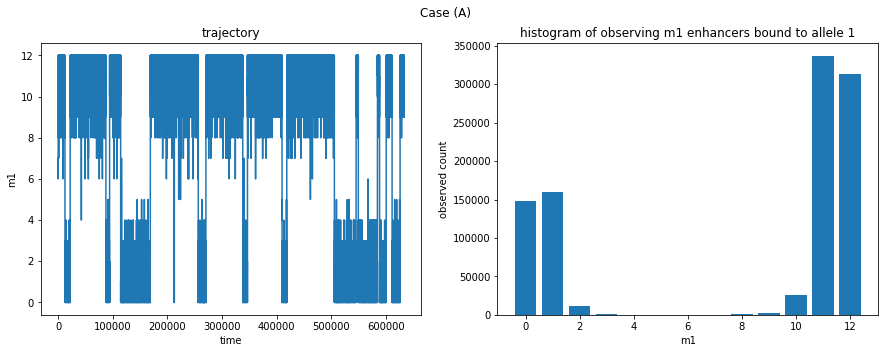

In [52]:
# transition coefficient
v = 1

# initial M, m1, m2
M = 12
m1 = random.randint(0, M+1)
m2 = M - m1

# parameters
#KbT = 4.11×10^−21 #???
#delta = -0.5 * KbT
delta = -0.5
# delta = 0

epsilon = 0 #????
epsilon1 = epsilon
epsilon2 = epsilon

Nstep = 1000000

dt_A, m1_record_A = simulation(Nstep, v, epsilon1, epsilon2, delta, m1, m2, M)

# plot trajectory
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Case (A)')
ax1.plot(dt_A, m1_record_A)
ax1.set_title('trajectory')
ax1.set_xlabel('time')
ax1.set_ylabel('m1')

# ax2.hist(m1_record_A)
nplist = m1_record_A.tolist()
prob = [nplist.count(i) for i in range(13)]
ax2.bar(list(range(13)), prob)
ax2.set_title('histogram of observing m1 enhancers bound to allele 1')
ax2.set_xlabel('m1')
ax2.set_ylabel('observed count')

## B) asymmetric case: ε1=ε, ε2=ε+ 0.5 kBT, δ =-0.5 kBT

Text(0, 0.5, 'observed count')

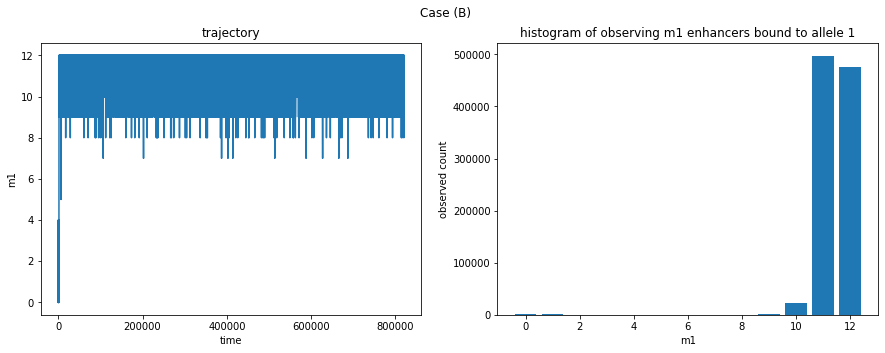

In [53]:
# transition coefficient
v = 1

# initial M, m1, m2
M = 12
m1 = random.randint(0, M+1)
m2 = M - m1

# parameters
delta = -0.5

epsilon = 0 #????
epsilon1 = epsilon
epsilon2 = epsilon + 0.5

Nstep = 1000000

dt_caseB, m1_record_caseB = simulation(Nstep, v, epsilon1, epsilon2, delta, m1, m2, M)

# plot trajectory
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Case (B)')
ax1.plot(dt_caseB, m1_record_caseB)
ax1.set_title('trajectory')
ax1.set_xlabel('time')
ax1.set_ylabel('m1')

nplist = m1_record_caseB.tolist()
prob = [nplist.count(i) for i in range(13)]
ax2.bar(list(range(13)), prob)
ax2.set_title('histogram of observing m1 enhancers bound to allele 1')
ax2.set_xlabel('m1')
ax2.set_ylabel('observed count')

## C) symmetric without cooperativity: ε1=ε2=ε, δ =0

Text(0, 0.5, 'observed count')

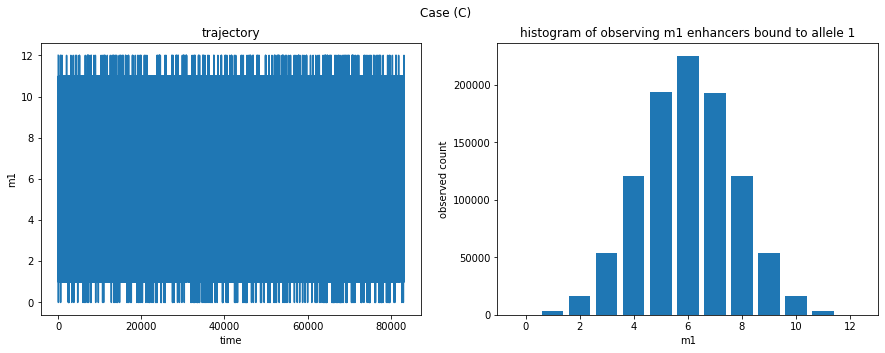

In [54]:
# transition coefficient
v = 1

# initial M, m1, m2
M = 12
m1 = random.randint(0, M+1)
m2 = M - m1

# parameters
delta = 0

epsilon = 0 #????
epsilon1 = epsilon
epsilon2 = epsilon

Nstep = 1000000

dt_caseC, m1_record_caseC = simulation(Nstep, v, epsilon1, epsilon2, delta, m1, m2, M)

# plot trajectory
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Case (C)')
ax1.plot(dt_caseC, m1_record_caseC)
ax1.set_title('trajectory')
ax1.set_xlabel('time')
ax1.set_ylabel('m1')

nplist = m1_record_caseC.tolist()
prob = [nplist.count(i) for i in range(13)]
ax2.bar(list(range(13)), prob)
ax2.set_title('histogram of observing m1 enhancers bound to allele 1')
ax2.set_xlabel('m1')
ax2.set_ylabel('observed count')

## D) asymmetric case without cooperativity: ε1=ε, ε2=ε+ 0.5 kBT, δ =0

Text(0, 0.5, 'observed count')

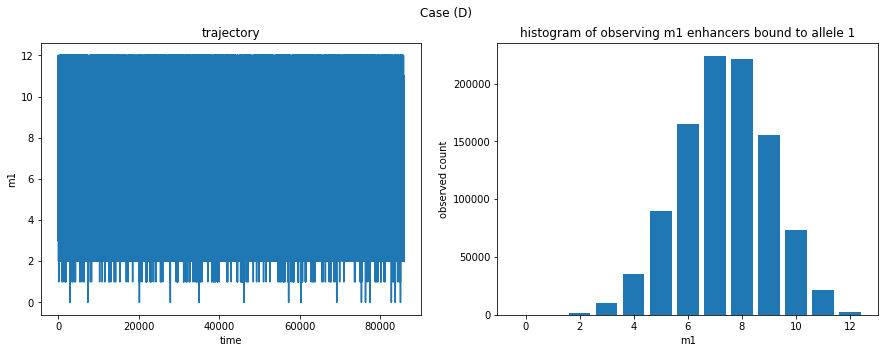

In [55]:
# transition coefficient
v = 1

# initial M, m1, m2
M = 12
m1 = random.randint(0, M+1)
m2 = M - m1

# parameters
delta = 0

epsilon = 0 #????
epsilon1 = epsilon
epsilon2 = epsilon + 0.5

Nstep = 1000000

dt_caseD, m1_record_caseD = simulation(Nstep, v, epsilon1, epsilon2, delta, m1, m2, M)

# plot trajectory
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Case (D)')
ax1.plot(dt_caseD, m1_record_caseD)
ax1.set_title('trajectory')
ax1.set_xlabel('time')
ax1.set_ylabel('m1')

nplist = m1_record_caseD.tolist()
prob = [nplist.count(i) for i in range(13)]
ax2.bar(list(range(13)), prob)
ax2.set_title('histogram of observing m1 enhancers bound to allele 1')
ax2.set_xlabel('m1')
ax2.set_ylabel('observed count')

# Q2

## case A

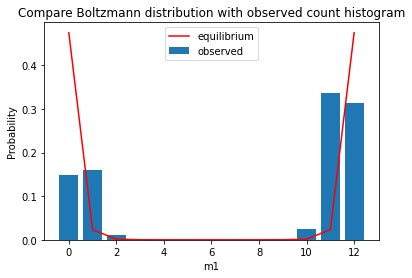

In [58]:
# transition coefficient
v = 1

# initial M, m1, m2
M = 12

# parameters
delta = -0.5

epsilon = 0
epsilon1 = epsilon
epsilon2 = epsilon

Pm1_list = []

Pm1_deno = 0
for m1 in range(M+1):
    m2 = M - m1
    Em1 = m1*epsilon1 + m2*epsilon2 + (m1*(m1-1)*delta)/2 + (m2*(m2-1)*delta)/2
    Pm1_deno += (math.factorial(M) / ( math.factorial(m1) * math.factorial(m2))) * math.exp(-Em1)

for m1 in range(M+1):
    m2 = M - m1
    Em1 = m1*epsilon1 + m2*epsilon2 + (m1*(m1-1)*delta)/2 + (m2*(m2-1)*delta)/2
    Pm1 = ((math.factorial(M) / ( math.factorial(m1) * math.factorial(m2))) * math.exp(-Em1))/Pm1_deno
    Pm1_list.append(Pm1)

# plot comparison
nplist = m1_record_A.tolist()
prob = [nplist.count(i)/len(nplist) for i in range(13)]
plt.bar(list(range(13)), prob)

plt.plot(Pm1_list, color='red')
plt.title('Compare Boltzmann distribution with observed count histogram')
plt.xlabel('m1')
plt.ylabel('Probability')
plt.legend(["equilibrium", "observed"], loc='upper center')

## Case B

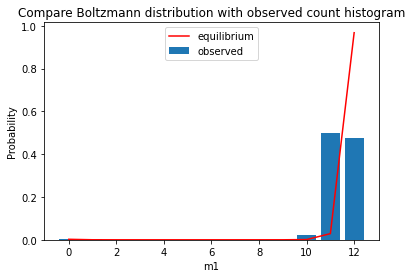

In [59]:
# transition coefficient
v = 1

# initial M, m1, m2
M = 12

# parameters
delta = -0.5

epsilon = 0
epsilon1 = epsilon
epsilon2 = epsilon +0.5

Pm1_list = []

Pm1_deno = 0
for m1 in range(M+1):
    m2 = M - m1
    Em1 = m1*epsilon1 + m2*epsilon2 + (m1*(m1-1)*delta)/2 + (m2*(m2-1)*delta)/2
    Pm1_deno += (math.factorial(M) / ( math.factorial(m1) * math.factorial(m2))) * math.exp(-Em1)

for m1 in range(M+1):
    m2 = M - m1
    Em1 = m1*epsilon1 + m2*epsilon2 + (m1*(m1-1)*delta)/2 + (m2*(m2-1)*delta)/2
    Pm1 = ((math.factorial(M) / ( math.factorial(m1) * math.factorial(m2))) * math.exp(-Em1))/Pm1_deno
    Pm1_list.append(Pm1)

# plot comparison
nplist = m1_record_caseB.tolist()
prob = [nplist.count(i)/len(nplist) for i in range(13)]
plt.bar(list(range(13)), prob)

plt.plot(Pm1_list, color='red')
plt.title('Compare Boltzmann distribution with observed count histogram')
plt.xlabel('m1')
plt.ylabel('Probability')
plt.legend(["equilibrium", "observed"], loc='upper center')

## case C

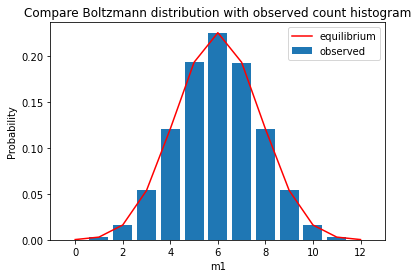

In [61]:
# transition coefficient
v = 1

# initial M, m1, m2
M = 12

# parameters
delta = 0

epsilon = 0
epsilon1 = epsilon
epsilon2 = epsilon

Pm1_list = []

Pm1_deno = 0
for m1 in range(M+1):
    m2 = M - m1
    Em1 = m1*epsilon1 + m2*epsilon2 + (m1*(m1-1)*delta)/2 + (m2*(m2-1)*delta)/2
    Pm1_deno += (math.factorial(M) / ( math.factorial(m1) * math.factorial(m2))) * math.exp(-Em1)

for m1 in range(M+1):
    m2 = M - m1
    Em1 = m1*epsilon1 + m2*epsilon2 + (m1*(m1-1)*delta)/2 + (m2*(m2-1)*delta)/2
    Pm1 = ((math.factorial(M) / ( math.factorial(m1) * math.factorial(m2))) * math.exp(-Em1))/Pm1_deno
    Pm1_list.append(Pm1)

# plot comparison
nplist = m1_record_caseC.tolist()
prob = [nplist.count(i)/len(nplist) for i in range(13)]
plt.bar(list(range(13)), prob)

plt.plot(Pm1_list, color='red')
plt.title('Compare Boltzmann distribution with observed count histogram')
plt.xlabel('m1')
plt.ylabel('Probability')
plt.legend(["equilibrium", "observed"], loc='best')

## case D

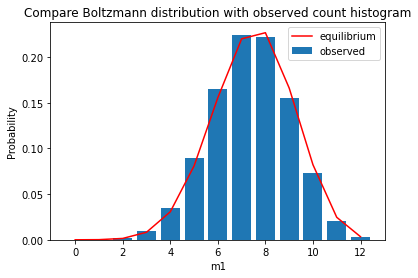

In [62]:
# transition coefficient
v = 1

# initial M, m1, m2
M = 12

# parameters
delta = 0

epsilon = 0
epsilon1 = epsilon
epsilon2 = epsilon + 0.5

Pm1_list = []

Pm1_deno = 0
for m1 in range(M+1):
    m2 = M - m1
    Em1 = m1*epsilon1 + m2*epsilon2 + (m1*(m1-1)*delta)/2 + (m2*(m2-1)*delta)/2
    Pm1_deno += (math.factorial(M) / ( math.factorial(m1) * math.factorial(m2))) * math.exp(-Em1)

for m1 in range(M+1):
    m2 = M - m1
    Em1 = m1*epsilon1 + m2*epsilon2 + (m1*(m1-1)*delta)/2 + (m2*(m2-1)*delta)/2
    Pm1 = ((math.factorial(M) / ( math.factorial(m1) * math.factorial(m2))) * math.exp(-Em1))/Pm1_deno
    Pm1_list.append(Pm1)

# plot comparison
nplist = m1_record_caseD.tolist()
prob = [nplist.count(i)/len(nplist) for i in range(13)]
plt.bar(list(range(13)), prob)

plt.plot(Pm1_list, color='red')
plt.title('Compare Boltzmann distribution with observed count histogram')
plt.xlabel('m1')
plt.ylabel('Probability')
plt.legend(["equilibrium", "observed"], loc='best')